In [2]:
from matplotlib import pyplot as plt
import torch
import numpy as np
from scipy import stats
import math
from typing import List, Tuple, Any
import sqlite3
import os

In [4]:
def plot_database_columns(test_names, x_column, y_column, table_name, z_column=None, focus=None):
    """
    Create a scatter plot from two columns in a SQLite database table.
    
    Parameters:
    test_names (list): List of names of the tests to be plotted
    x_column (str): Name of the column to plot on x-axis
    y_column (str): Name of the column to plot on y-axis
    table_name (str): Name of the table in the database
    z_column (str, optional): Name of column to filter on
    focus (list, optional): List of values to filter z_column by
    """

    # Create figure once, outside the loop
    plt.figure(figsize=(8, 4))
    # Create a list of colors for different tests
    colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
    # Store statistics for all tests
    stats_summary = {}

    for idx, test_name in enumerate(test_names):

        # Select the right database and color for the plotting
        color = colors[idx % len(colors)]  # Cycle through colors if more tests than colors
        database_path = os.path.join("Databases", f"database_{test_name}.db")

        try:
            # Use context manager for database connection
            with sqlite3.connect(database_path) as conn:
                cursor = conn.cursor()
                
                # Create a query to select the desired columns with optional filtering
                if z_column and focus:
                    # Convert the focus list to string for SQL IN clause
                    focus_str = ', '.join('?' * len(focus))
                    # No need for separate column selection if column_z is x_column or y_column
                    query = f"""
                        SELECT DISTINCT {x_column}, {y_column}
                        FROM {table_name}
                        WHERE {z_column} IN ({focus_str})
                    """
                    # Execute with parameters
                    cursor.execute(query, focus)
                else:
                    query = f"SELECT {x_column}, {y_column} FROM {table_name}"
                    cursor.execute(query)
                
                results = cursor.fetchall()
                
                if not results:
                    print("No data found matching the specified criteria.")
                    return
            
            # Convert results directly to numpy arrays
            x_array = np.array([float(row[0]) for row in results])
            y_array = np.array([float(row[1]) for row in results])
            
            # Calculate regression line
            slope, intercept, r_value, p_value, std_err = stats.linregress(x_array, y_array)
            
            # Create points for regression line
            line_x = np.array([x_array.min(), x_array.max()]).reshape(-1, 1)
            line_y = slope * line_x + intercept

            # Store statistics
            stats_summary[test_name] = {
                'slope': slope,
                'intercept': intercept,
                'r_squared': r_value**2,
                'p_value': p_value,
                'std_err': std_err
            }
            #print(f'Regression line\ny = {slope:.4f}x + {intercept:.4f}\nR² = {r_value**2:.4f}\np value = {p_value}\nstd_error = {std_err}')
            
            # Create the scatter plot
            plt.scatter(x_array, y_array, alpha=0.3, color=color, s=5)
            
            # Plot regression line
            plt.plot(line_x, line_y, linestyle='-', label=f"{test_name}", color=color)
                    #label=f'Regression line\ny = {slope:.4f}x + {intercept:.4f}\nR² = {r_value**2:.4f}\np value = {p_value}\nstd_error = {std_err}')            
            
        except sqlite3.Error as e:
            print(f"Database error: {e}")
        except Exception as e:
            print(f"Error: {e}")

   # Customize the plot (only once, after all tests are plotted)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    title = f'{y_column} vs {x_column}'
    if z_column and focus:
        title += f'\n(filtered {z_column} in {focus})'
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

    # Print detailed statistics
    print("\nRegression Statistics:")
    print("-" * 50)
    for test_name, stats_dict in stats_summary.items():
        print(f"\n{test_name}:")
        print(f"Equation: y = {stats_dict['slope']:.4f}x + {stats_dict['intercept']:.4f}")
        print(f"R² = {stats_dict['r_squared']:.4f}")
        print(f"p-value = {stats_dict['p_value']:.4e}")
        print(f"Standard Error = {stats_dict['std_err']:.4f}")

    # Show the plot (only once, after everything is done)
    plt.show()

Regression line
y = 0.0094x + 0.1706
R² = 0.0010
p value = 0.8186886539842293
std_error = 0.04067210313866632


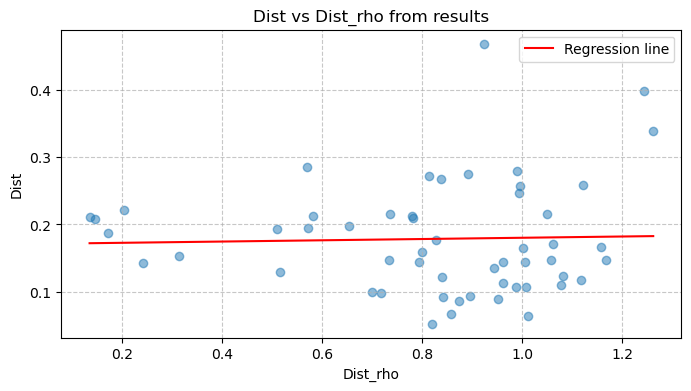

In [11]:
test_name = "New_everything"
x_column = "Dist_rho"
y_column = "Dist"
table_name = "results"

z_column = None#"n_traj_points"
focus = None#[11, 50]

plot_database_columns(test_name, x_column, y_column, table_name, z_column=z_column, focus=focus)


Regression Statistics:
--------------------------------------------------

true_formula:
Equation: y = -0.0000x + 0.5049
R² = 0.0001
p-value = 9.0515e-01
Standard Error = 0.0001

easy_formula:
Equation: y = 0.0000x + 0.1719
R² = 0.0037
p-value = 5.3287e-01
Standard Error = 0.0000


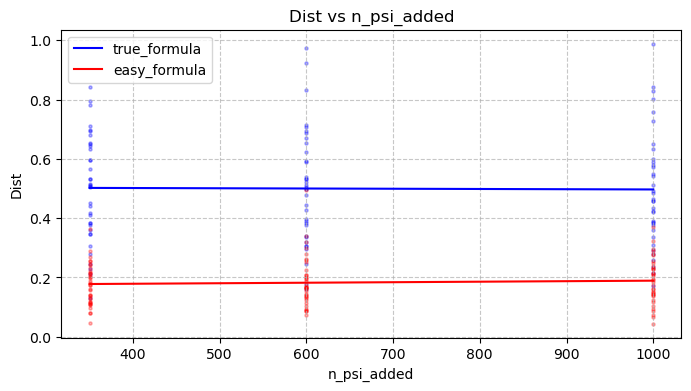


Regression Statistics:
--------------------------------------------------

true_formula:
Equation: y = -0.0000x + 0.5186
R² = 0.0021
p-value = 6.3899e-01
Standard Error = 0.0000

easy_formula:
Equation: y = -0.0000x + 0.1968
R² = 0.0064
p-value = 4.1169e-01
Standard Error = 0.0000


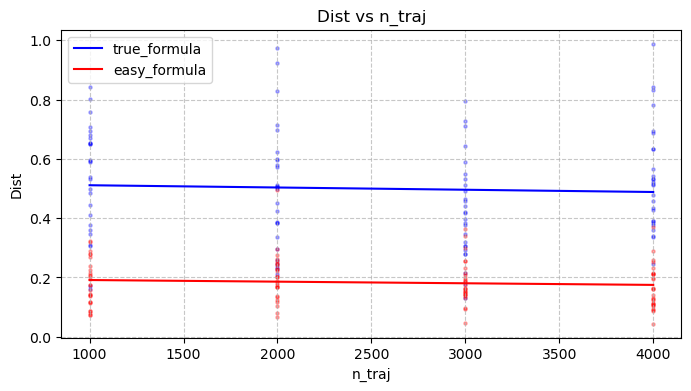


Regression Statistics:
--------------------------------------------------

true_formula:
Equation: y = 0.0914x + 0.4265
R² = 0.0064
p-value = 4.0956e-01
Standard Error = 0.1104

easy_formula:
Equation: y = 0.0212x + 0.1662
R² = 0.0020
p-value = 6.4211e-01
Standard Error = 0.0454


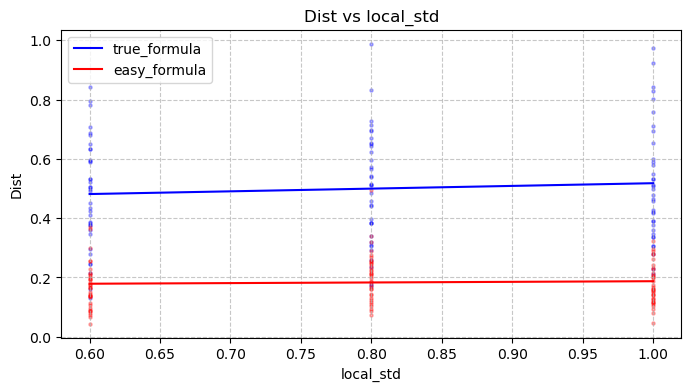


Regression Statistics:
--------------------------------------------------

true_formula:
Equation: y = -0.0004x + 0.5125
R² = 0.0014
p-value = 6.9858e-01
Standard Error = 0.0010

easy_formula:
Equation: y = 0.0012x + 0.1430
R² = 0.0818
p-value = 2.7025e-03
Standard Error = 0.0004


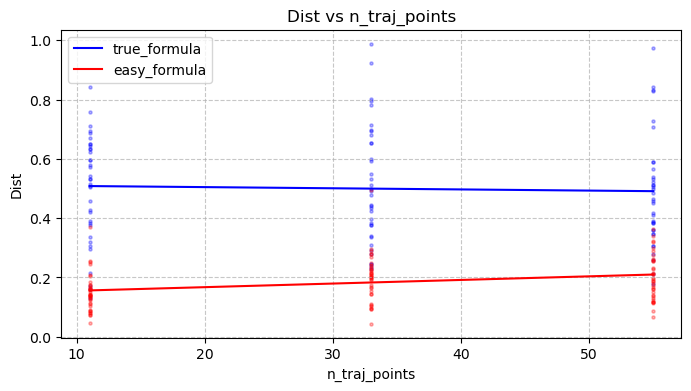

In [5]:
#['n_psi_added', 'n_traj', 'local_std', 'n_traj_points', 'Dist', 'Cos_Dist', 'Dist_rho', 'Norm_glob', 'Norm_loc', 'Norm_imp', 'Pinv_error', 'Sum_weights', 'Sum_squared_weights', 'Elapsed_time', 'Process_mem']

test_names = ["true_formula", "easy_formula"]
y_column = "Dist"
table_name = "results"
params = ["n_psi_added", "n_traj", "local_std", "n_traj_points"]

z_column = None#"n_traj_points"
focus = None#[33, 55]

for x_column in params:
    plot_database_columns(test_names, x_column, y_column, table_name, z_column=z_column, focus=focus)